In [25]:
import numpy as np
import matplotlib.pyplot as plt

from librosa.display import specshow
from IPython.display import Audio

from birdclef import Dataset, SummaryStatistics
from birdclef import FeaturePipeline
from birdclef import ConstellationMap, Fingerprint

### load data

In [2]:
dataset = Dataset.load(Dataset.PATH)
summary = SummaryStatistics(dataset)

### basic summary statistics

In [3]:
summary.num_samples()

16941

In [4]:
label_counts = summary.label_counts()
labels = list(label_counts.keys())
counts = [label_counts[label] for label in labels]

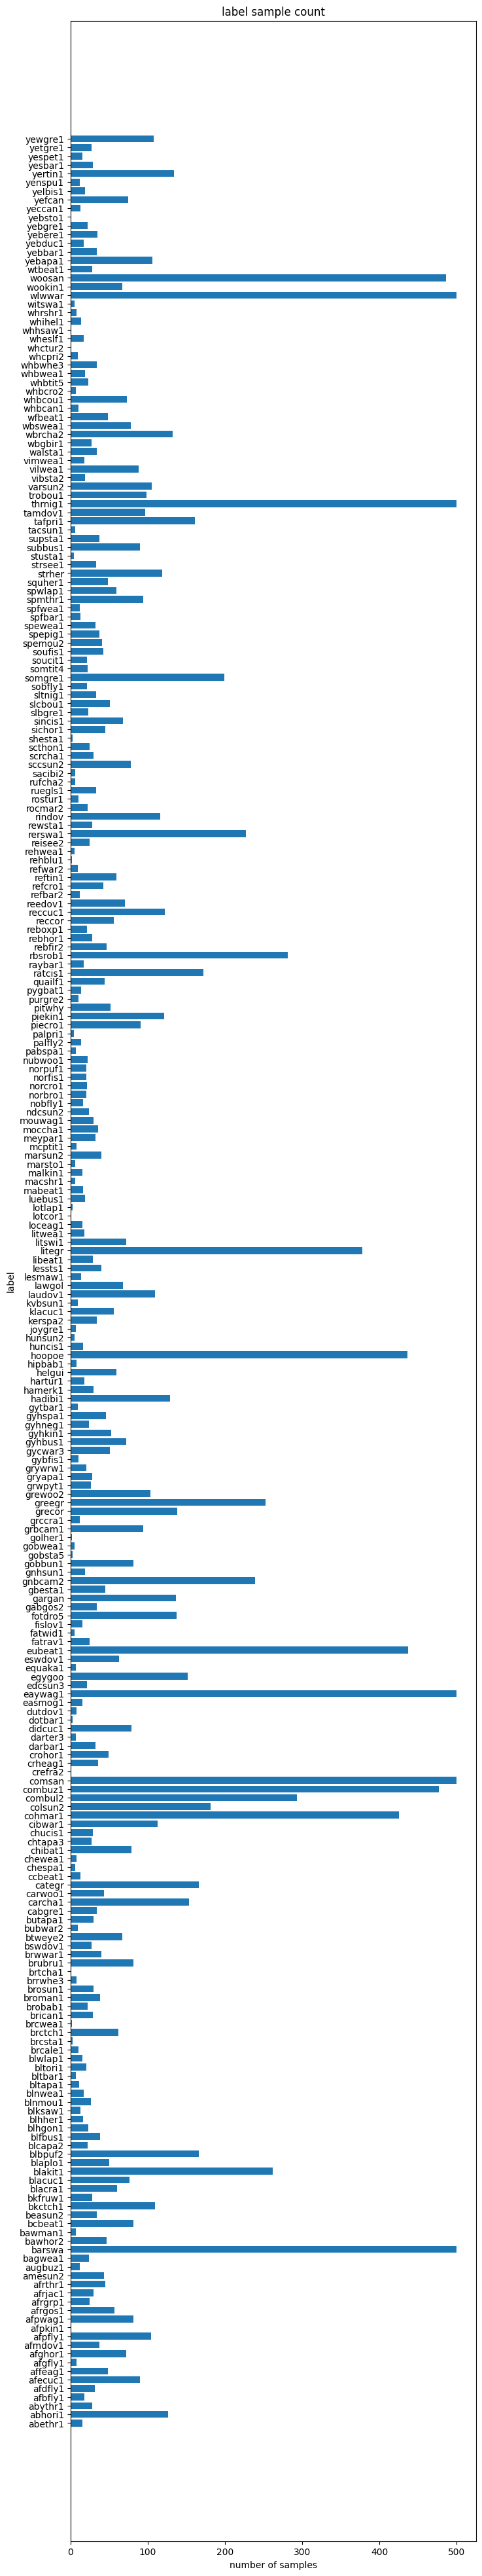

In [5]:
fig, ax = plt.subplots(figsize=(8, 50))
ax.barh(labels, counts)

ax.set_title("label sample count")
ax.set_xlabel("number of samples")
ax.set_ylabel("label")

plt.show()

In [6]:
audio_sample_counts = summary.audio_sample_counts()

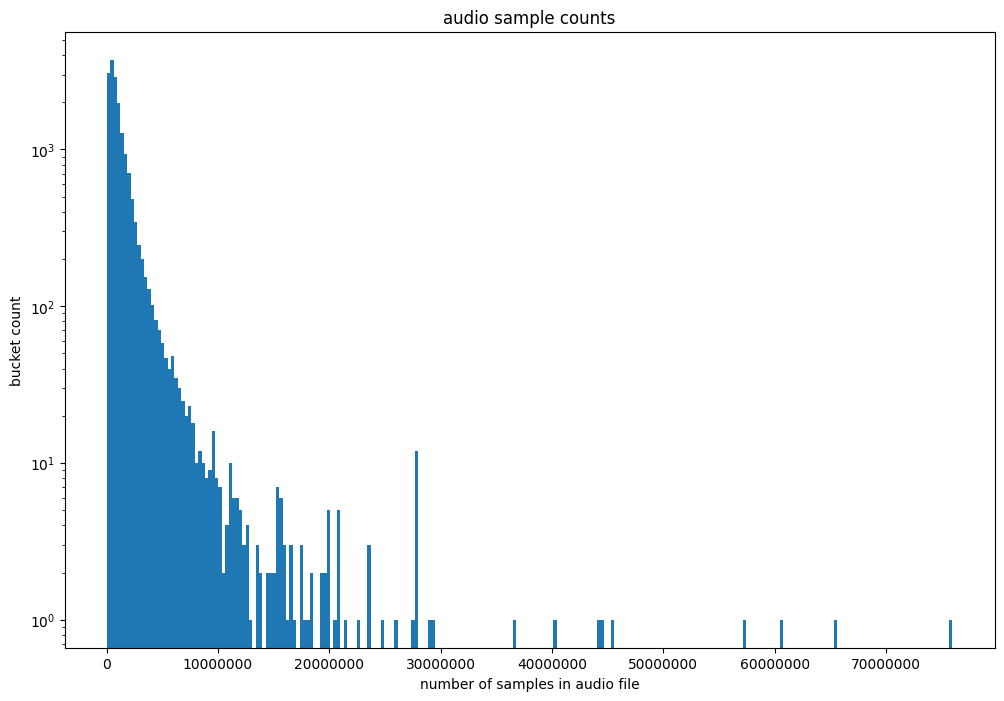

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(audio_sample_counts, bins=250, log=True)

ax.set_title("audio sample counts")
ax.set_xlabel("number of samples in audio file")
ax.set_ylabel("bucket count")
ax.ticklabel_format(style="plain", useOffset=False, axis="x") 

plt.show()

### pick a random sample and analyse its audio

In [6]:
random = dataset.pick_random()
audio_samples = np.array(random.audio_samples(Dataset.SAMPLE_RATE))

In [7]:
random.audio_file_path

'/media/william/Scratch/datasets/birdclef-2023/train_audio/combuz1/XC199445.ogg'

In [8]:
Audio(random.audio_file_path)

In [9]:
len(audio_samples)

1803912

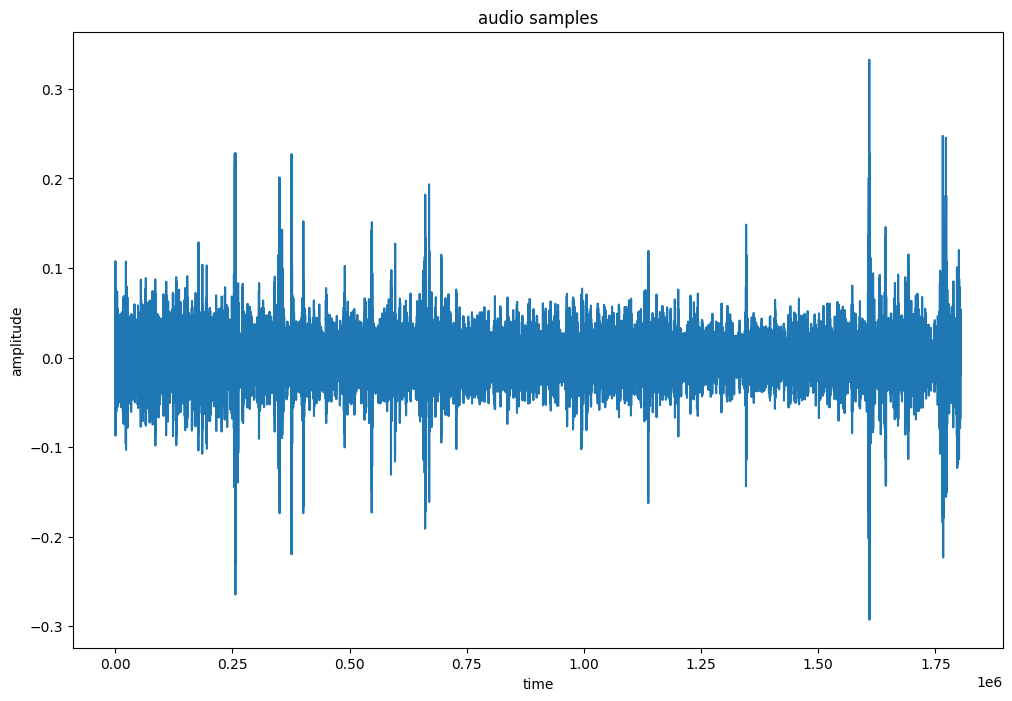

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(audio_samples)

ax.set_title("audio samples")
ax.set_xlabel("time")
ax.set_ylabel("amplitude")

plt.show()

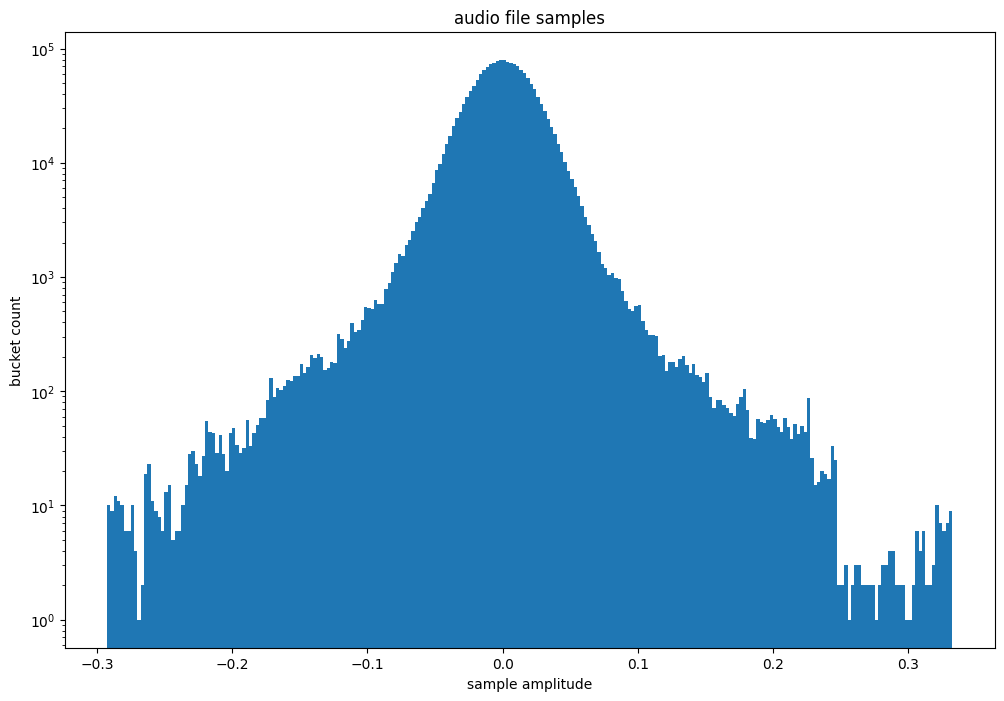

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(audio_samples, bins=250, log=True)

ax.set_title("audio file samples")
ax.set_xlabel("sample amplitude")
ax.set_ylabel("bucket count")

plt.show()

In [12]:
pipe1 = FeaturePipeline.build_pipeline_1()
pipe2 = FeaturePipeline.build_pipeline_2(n_components=10)
pipe3 = FeaturePipeline.build_pipeline_3(n_components=10)

In [13]:
x1 = pipe1(audio_samples)
x2 = pipe2(audio_samples)
x3 = pipe3(audio_samples)

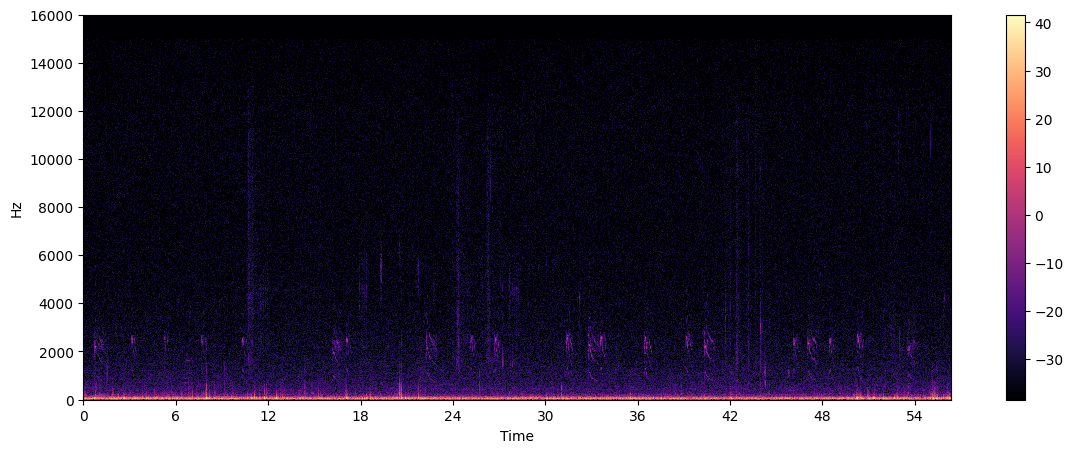

In [14]:
plt.figure(figsize=(14, 5))
specshow(x1, sr=Dataset.SAMPLE_RATE, x_axis="time", y_axis="hz")
plt.colorbar()

In [15]:
x1.shape

(1025, 3524)

In [16]:
f"{(x1.itemsize * x1.size) / 1e6}mb"

'14.4484mb'

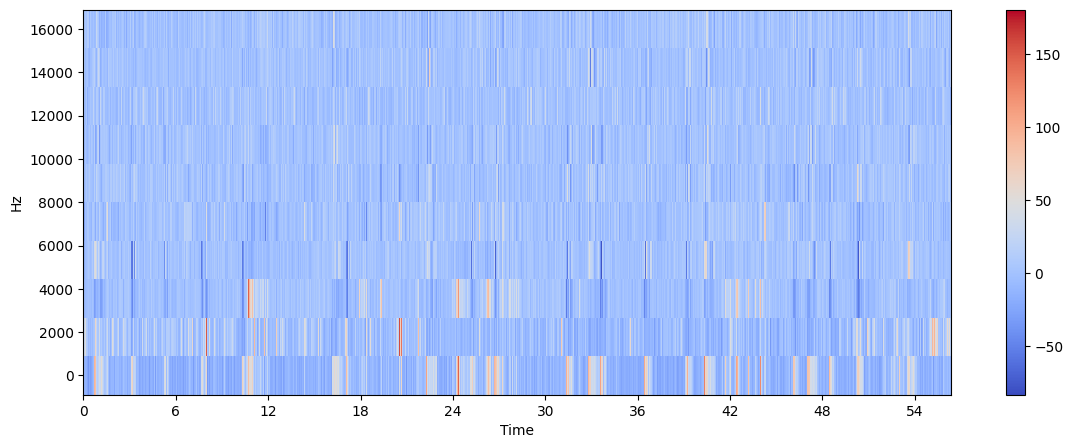

In [17]:
plt.figure(figsize=(14, 5))
specshow(x2, sr=Dataset.SAMPLE_RATE, x_axis="time", y_axis="hz")
plt.colorbar()

In [18]:
x2.shape

(10, 3524)

In [19]:
f"{(x2.itemsize * x2.size) / 1e6}mb"

'0.14096mb'

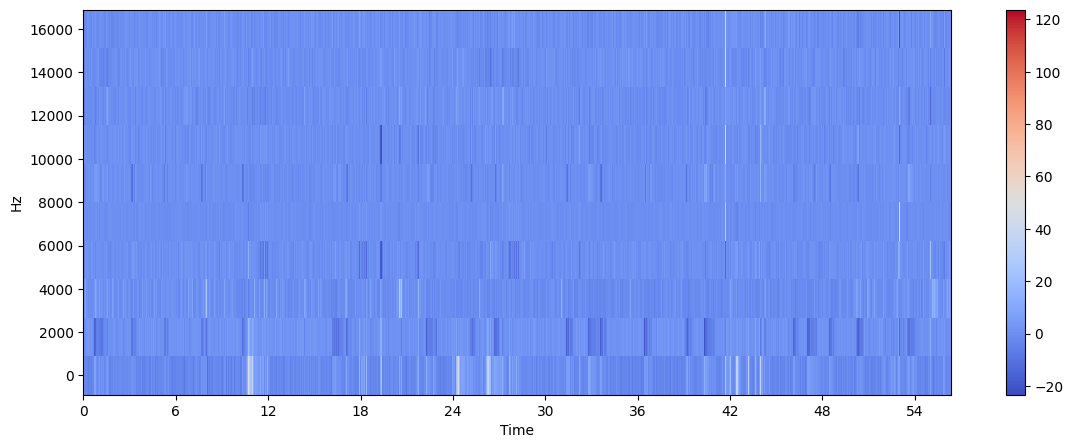

In [20]:
plt.figure(figsize=(14, 5))
specshow(x3, sr=Dataset.SAMPLE_RATE, x_axis="time", y_axis="hz")
plt.colorbar()

In [21]:
x3.shape

(10, 3524)

In [22]:
f"{(x3.itemsize * x3.size) / 1e6}mb"

'0.14096mb'

### peak finding algorithm

In [23]:
cmap = ConstellationMap.from_spectrogram(spectrogram=x1, threshold=2.75)

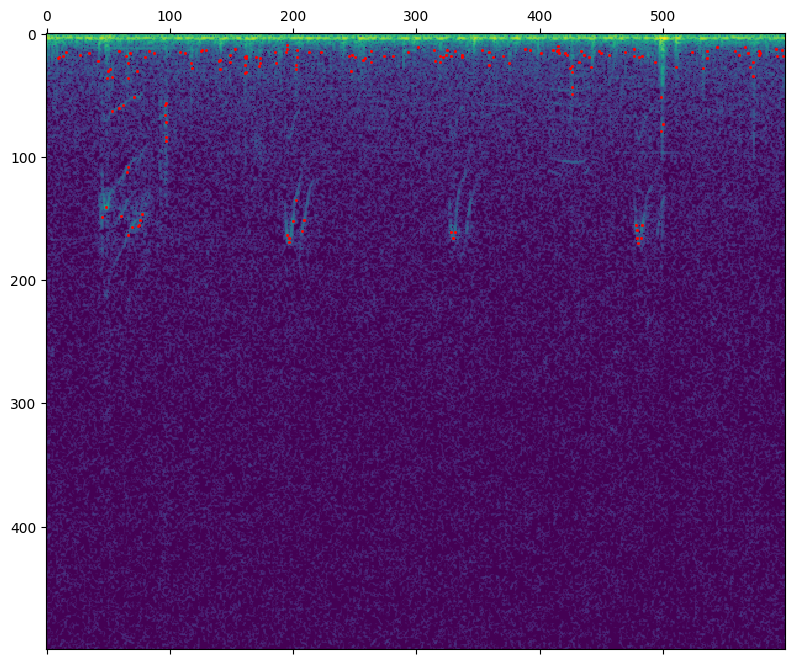

In [24]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(
    x=[p.x for p in cmap],
    y=[p.y for p in cmap],
    s=1.5,
    color="red"
)

ax.matshow(x1[:500, :600])

In [35]:
fingerprints = cmap.fingerprints(
    label=random.label,
    region_size=250,
    hash_func=Fingerprint.HASH_FUNCTION
)

In [36]:
len(list(fingerprints))

64832